In [1]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('lr', LinearRegression())])

In [2]:
#Hämta in Dataset Diamons
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


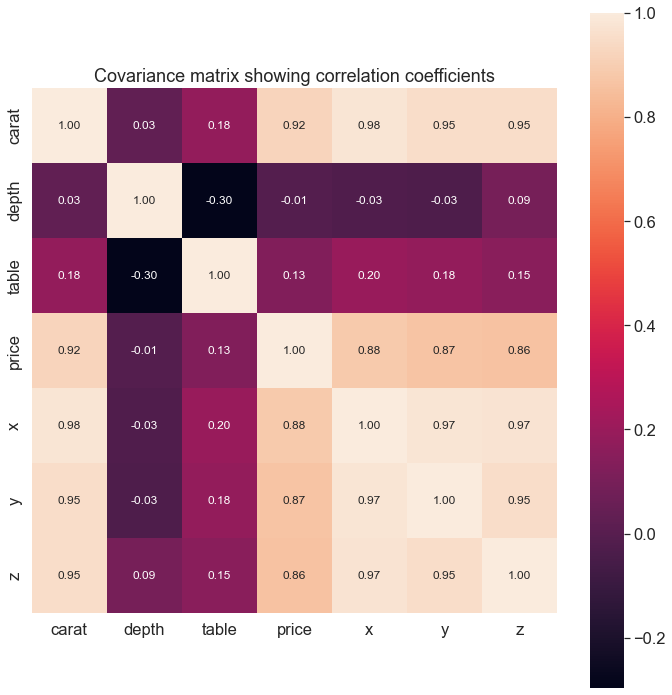

In [3]:
cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

stdsc = StandardScaler()
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,7)].values)
cov_mat = np.cov(X_std.T)
                            
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

Formulan är  
7756 x - 2256
0.8493305264354858
0.8493305264354858


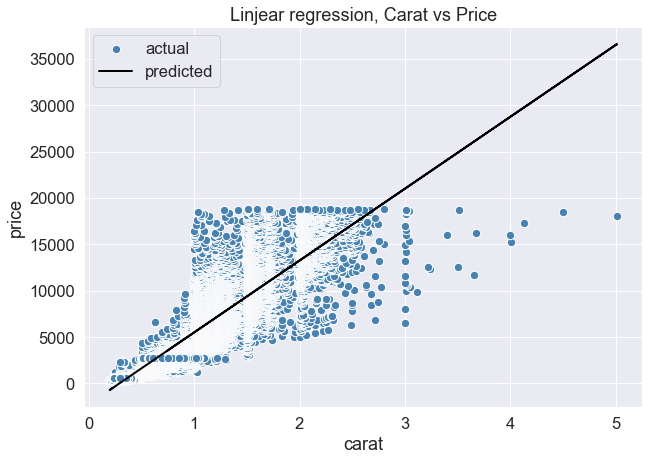

In [4]:
X = df['carat']
y = df['price']

z = np.polyfit(X,y,1)
p = np.poly1d(z)
print(f"Formulan är {p}")

y_pred_numpy = p(X)
R2_numpy = 1 - ((y-y_pred_numpy)**2).sum()/((y-y.mean())**2).sum()
print(R2_numpy)

print(r2_score(y, y_pred_numpy))


plt.figure(figsize=(10,7))
plt.scatter(X,y,c='steelblue', edgecolor='white', s=70, 
             label='actual')
plt.plot(X,y_pred_numpy, color='black', lw=2, label='predicted')
plt.xlabel('carat')
plt.ylabel('price')
plt.title('Linjear regression, Carat vs Price')
plt.legend()
plt.show()

Formulan är  
0.09393 x + 0.3377
0.03376779166822608
0.03376779166822608


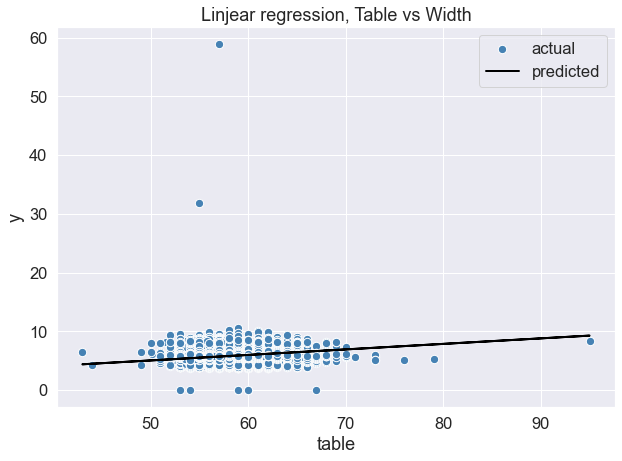

In [5]:
X = df['table']
y = df['y']

z = np.polyfit(X,y,1)
p = np.poly1d(z)
print(f"Formulan är {p}")

y_pred_numpy = p(X)
R2_numpy = 1 - ((y-y_pred_numpy)**2).sum()/((y-y.mean())**2).sum()
print(R2_numpy)

print(r2_score(y, y_pred_numpy))


plt.figure(figsize=(10,7))
plt.scatter(X,y,c='steelblue', edgecolor='white', s=70, 
             label='actual')
plt.plot(X,y_pred_numpy, color='black', lw=2, label='predicted')
plt.xlabel('table')
plt.ylabel('y')
plt.title('Linjear regression, Table vs Width')
plt.legend()
plt.show()